## Configure Environment

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Work/AHEAD-AWS
base_path = "/content/drive/MyDrive/Work/AHEAD-AWS"
data_path = f"{base_path}/data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Work/AHEAD-AWS


In [ ]:
import os
import pandas as pd
from PIL import Image, ImageDraw

# Dataset

## Visualize data

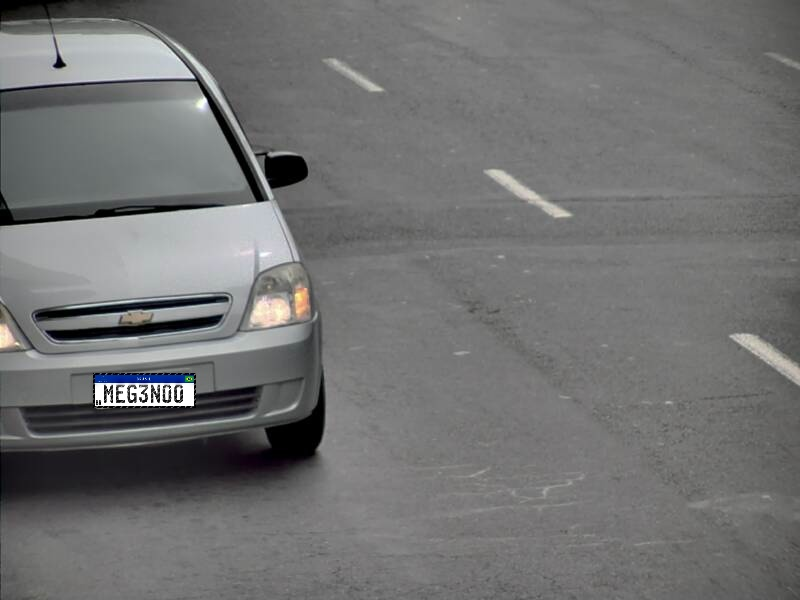

In [ ]:
dataset_df = pd.read_csv(f"{data_path}/dataset.csv")
def get_image_and_annotations(index, dataset_df=dataset_df, data_path=data_path):
  image_name = dataset_df.iloc[index]["image"]
  annotations_name = dataset_df.iloc[index]["label"]

  
  image_path = f"{data_path}/images/{image_name}"
  annotations_path = f"{data_path}/labels/{annotations_name}"
  if 'split' in dataset_df.columns:
    split = dataset_df.iloc[index]["split"]
    image_path = f"{data_path}/images/{split}/{image_name}"
    annotations_path = f"{data_path}/labels/{split}/{annotations_name}"

  annotations = ""
  with open(annotations_path) as f:
    annotations = f.read()
  annotations = tuple([tuple(map(float, line.strip().split())) for line in annotations.strip().split("\n")])
  image = Image.open(image_path)

  return image, annotations

image, annotations = get_image_and_annotations(0)
image

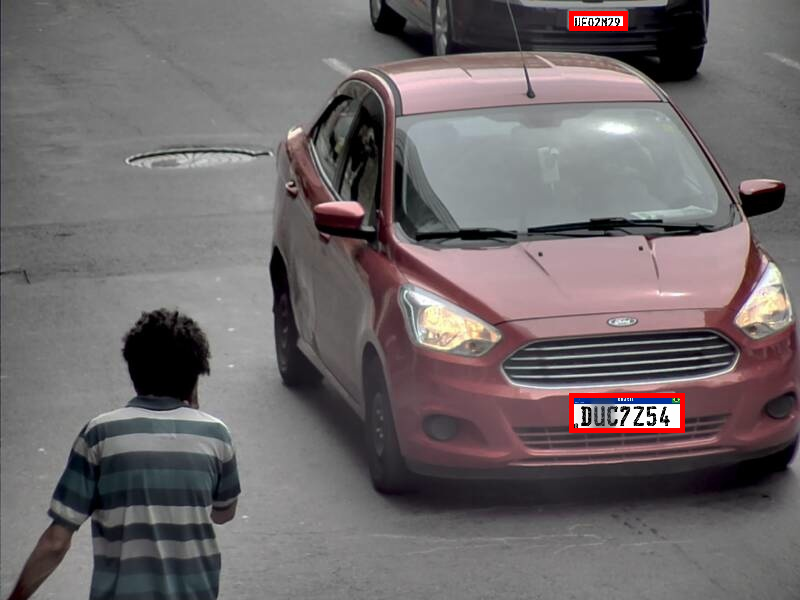

In [ ]:
def show_bbox(image=None, annotations=None, index=None):

    # Open the image and create ImageDraw object for drawing
    if index is not None:
      image, annotations = get_image_and_annotations(index)
    else:
      image = image.copy()

    draw = ImageDraw.Draw(image)

    for line in annotations:
        # Split the line into five values
        label, x, y, w, h = line

        # Convert center position, width, height into
        # top-left and bottom-right coordinates
        W, H = image.size
        x1 = (x - w/2) * W
        y1 = (y - h/2) * H
        x2 = (x + w/2) * W
        y2 = (y + h/2) * H

        # Draw the bounding box with red lines
        draw.rectangle((x1, y1, x2, y2),
                        outline=(255, 0, 0), # Red in RGB
                        width=5)             # Line width
    display(image)
    

show_bbox(index=1)

## Transfer learn yolo

In [ ]:
# !git clone https://github.com/ultralytics/yolov5

!pip install -U -r ../docker-image/app/yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! python ../docker-image/app/yolov5/train.py --data data/number_plates.yaml --weights yolov5s.pt --epochs 5 --batch 32 --freeze 10

train: weights=yolov5s.pt, cfg=, data=data/number_plates.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[10], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.0